In [15]:
import pandas as pd
import numpy as np
import yaml
pd.__version__

data = pd.read_csv('uk-500.csv')
data.head(2)

,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web
0,Aleshia,Tomkiewicz,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk
1,Evan,Zigomalas,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk


# tutorial
* 20个Pandas函数: https://mp.weixin.qq.com/s/9a15G1XbZGHX5n9zi5USIA
* api：https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

# Series

## using list to create Series
```python
infoLi = ['jack', 18, '180CM']
serLi = pd.Series(data=infoLi)
```

## using dict 
```python
infoDic = {'name': 'jack', 'age': 18, 'height': '180CM'}
serDic = pd.Series(data=infoDic)
serDic['name']
```

## convert
* serLi.tolist()
* serDic.to_dict()
* df = pd.DataFrame(data=serDic, columns=['信息'])

## map
* smap = s.map(lambda x: float(x))
* smap = s.map(float)

## concat: add new elements

```python
s = pd.Series(data=['001', '002'], index=list('ab'))
sCon = pd.Series(data=['003', '004'], index=['c', 'd'])
s = pd.concat([s, sCon])

# 指定axis=1,横向追加，两个Series横向追加会变成DataFrame
df = pd.concat([s, sCon], axis=1)
```

'jack'

In [3]:
!jupyter lab paths

[LabPathApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `LabPathApp`.
Application directory:   /home/jeffye/anaconda3/envs/py38/share/jupyter/lab
User Settings directory: /home/jeffye/.jupyter/lab/user-settings
Workspaces directory: /home/jeffye/.jupyter/lab/workspaces


# create dataframe


## list of list

In [4]:
# initialize list of lists
data = [['tom', 10], ['nick', 15], ['juli', 14]]
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Name', 'Age'])

# print dataframe.
df.loc

,Name,Age
0,tom,10
1,nick,15
2,juli,14


## from dict of ndarray/lists


In [7]:
# initialize data of lists. dict key is column
data = {'Name': ['Tom', 'nick', 'krish', 'jack'],
        'Age': [20, 21, 19, 18]}

# Create DataFrame
df = pd.DataFrame(data)
# Print the output.
df.head()

,Name,Age
0,Tom,20
1,nick,21
2,krish,19
3,jack,18


## Creates indexes DataFrame using arrays.


In [8]:
# initialize data of lists.
data = {'Name':['Tom', 'Jack', 'nick', 'juli'],
        'marks':[99, 98, 95, 90]}
 
# Creates pandas DataFrame.
df = pd.DataFrame(data, index =['rank1',
                                'rank2',
                                'rank3',
                                'rank4'])
 
# print the data
df.tail(4)

,Name,marks
rank1,Tom,99
rank2,Jack,98
rank3,nick,95
rank4,juli,90


## from list of dicts

In [3]:
# Initialize data to lists. "NaN" will be added automatically if having missing values
data = [{'a': 1, 'b': 2, 'c':3, 'd': 8},
        {'a':10, 'b': 20, 'c': 30}]
 
# Creates DataFrame.
df = pd.DataFrame(data)
 
# Print the data
df

,a,b,c,d
0,1,2,3,8.0
1,10,20,30,NaN


## using zip() function

In [14]:
# List1
Name = ['tom', 'krish', 'nick', 'juli']
   
# List2
Age = [25, 30, 26, 22]
   
# get the list of tuples from two lists.
# and merge them by using zip().
list_of_tuples = list(zip(Name, Age))
   
# Assign data to tuples.
list_of_tuples 
 
# Converting lists of tuples into
# pandas Dataframe.
df = pd.DataFrame(list_of_tuples,
                  columns = ['Name', 'Age'])
    
# Print data.
df

,Name,Age
0,tom,25
1,krish,30
2,nick,26
3,juli,22


## from Dicts of series.

In [16]:
# Initialize data to Dicts of series.
d = {'one' : pd.Series([10, 20, 30, 40],
                       index =['a', 'b', 'c', 'd']),
      'two' : pd.Series([10, 20, 30, 40],
                        index =['a', 'b', 'c', 'd'])}
 
# creates Dataframe.
df = pd.DataFrame(d)
 
# print the data.
df

,one,two
a,10,10
b,20,20
c,30,30
d,40,40


## date_range index

In [20]:
date_range = pd.date_range(start='2022-01-01', periods=100)  # date_rage可以生成各种类型的日期
data = {
    'normal': np.random.normal(loc=0, scale=1, size=100),  # 正态分布
    'uniform': np.random.uniform(low=0, high=1, size=100)  # 均匀分布
}
df = pd.DataFrame(data=data, index=date_range)
df.head(2)

,normal,uniform
2022-01-01,-0.162171,0.631594
2022-01-02,1.720361,0.380057


# describe
* df.describe(exclude='number') # exclude numerical columns

# info
* 获得DataFrame的简明摘要，包括每列中非空值的数量、每列的数据类型以及DataFrame的内存使用情况。




# check nan of row and columns


In [31]:
data = {'set_of_numbers': [1,2,3,4,5,np.nan,6,7,np.nan,8,9,10,np.nan], 
       'column2': [1,2,3,4,5,np.nan,6,7,np.nan,8,9,10,np.nan]}
df = pd.DataFrame(data)
print (df)

    set_of_numbers  column2
0              1.0      1.0
1              2.0      2.0
2              3.0      3.0
3              4.0      4.0
4              5.0      5.0
5              NaN      NaN
6              6.0      6.0
7              7.0      7.0
8              NaN      NaN
9              8.0      8.0
10             9.0      9.0
11            10.0     10.0
12             NaN      NaN


## Check for NaN under a single DataFrame column:


In [24]:
df['set_of_numbers'].isnull().values.any()

True

In [28]:
df['set_of_numbers'].isnull().sum()

3

In [35]:
df.isnull().head()

,set_of_numbers,column2
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


## ways of fill nan

- https://vimsky.com/zh-tw/examples/usage/python-pandas.DataFrame.fillna.html


## dropna


In [13]:
# Create a pandas DataFrame.
import pandas as pd
import numpy as np
technologies= {
    'Courses':["Spark","PySpark","Spark","Python","PySpark","Java"],
    'Fee' :[22000,25000,np.nan,np.nan,np.nan,np.nan],
    'Duration':['30days',np.nan,'30days','N/A', np.nan,np.nan]
          }
df = pd.DataFrame(technologies)
print(df)

   Courses      Fee Duration
0    Spark  22000.0   30days
1  PySpark  25000.0      NaN
2    Spark      NaN   30days
3   Python      NaN      N/A
4  PySpark      NaN      NaN
5     Java      NaN      NaN


In [14]:
# Using DataFrame.dropna() method drop all rows that have NAN/none.
df2=df.dropna()
print(df2)

  Courses      Fee Duration
0   Spark  22000.0   30days


# add a column


## change value of particular row and column


In [3]:
import pandas as pd
import numpy as np


data = {'column1': [1,2,3,4,5,np.nan,6,7,np.nan,8,9,10,np.nan], 
       'column2': [1,2,3,4,5,np.nan,6,7,np.nan,8,9,10,np.nan]}
df = pd.DataFrame(data)
# df['column3'] = list(range(len(data['column1'])))
df['column3'] = 0


df.loc[[11, 12], 'column3'] = [1, 3]
# df.drop(['column3'], axis=1, inplace=True)
df

,column1,column2,column3
0,1.0,1.0,1.0
1,2.0,2.0,2.0
2,3.0,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0
5,NaN,NaN,NaN
6,6.0,6.0,6.0
7,7.0,7.0,7.0
8,NaN,NaN,NaN
9,8.0,8.0,8.0


In [18]:
df.index[2]

2

# copy

## copy columns and also keep index


In [8]:
data = {"col1": [1, 2, 3], "col2": [4, 5, 6], "col3": [7, 8, 9]}
df = pd.DataFrame(data, index=['rank1', 'rank2', 'rank3'])
print(df.head())
selected_columns = df[["col1", "col2"]]

       col1  col2  col3
rank1     1     4     7
rank2     2     5     8
rank3     3     6     9


In [9]:
selected_columns

,col1,col2
rank1,1,4
rank2,2,5
rank3,3,6


## copy by merging multiple indices (tolist first)


In [40]:
new_df = df.loc[selected_columns.index[:2].tolist() + selected_columns.index[:2].tolist()]
new_df['col3'] = 9
new_df

,col1,col2,col3
rank1,1,4,9
rank2,2,5,9
rank1,1,4,9
rank2,2,5,9


# index


## reindex


## set a column as index


In [25]:
data.head()

,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web
0,Aleshia,Tomkiewicz,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk
1,Evan,Zigomalas,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk
2,France,Andrade,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk
3,Ulysses,Mcwalters,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk
4,Tyisha,Veness,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk


In [26]:
data.set_index("last_name", inplace=True)
data.head()

,first_name,company_name,address,city,county,postal,phone1,phone2,email,web
last_name,,,,,,,,,,
Tomkiewicz,Aleshia,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk
Zigomalas,Evan,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk
Andrade,France,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk
Mcwalters,Ulysses,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk
Veness,Tyisha,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk


In [32]:
data.loc['Veness']

first_name                              Tyisha
company_name                    Champagne Room
address                      5396 Forth Street
city                Greets Green and Lyng Ward
county                           West Midlands
postal                                 B70 9DT
phone1                            01547-429341
phone2                            01290-367248
email                tyisha.veness@hotmail.com
web             http://www.champagneroom.co.uk
Name: Veness, dtype: object

In [36]:
len(data.index)

500

# merge

* 适用于横向合并，纵向合并用concat，append

## merge 的方式（inner, outer, left, right)：

```
pd.merge(movies, ratings, on=['movie_id', 'title'], how='inner') # 拿到基于movie_id和title两列数值相同的行
   movie_id title description  user_id  rating time
0         1    t1          d1        1       5   t1
1         2    t2          d2        2       4   t2

pd.merge(movies, ratings, on=['movie_id', 'title'], how='outer') # 拿到两边所有的行，没有数据会被拉下，无法merge的列会被填上空值
   movie_id title description  user_id  rating time
0         1    t1          d1      1.0     5.0   t1
1         2    t2          d2      2.0     4.0   t2
2         3    t3          d3      NaN     NaN  NaN
3         5    t5          d5      NaN     NaN  NaN
4         7    t7          d7      NaN     NaN  NaN
5         4    t3         NaN      7.0     3.0   t4
6         5    t4         NaN      9.0     2.0   t4
7         6    t5         NaN     11.0     3.0   t1
8         7    t6         NaN     15.0     1.0   t3

pd.merge(movies, ratings, on=['movie_id', 'title'], how='left') # 存下左Dataframe所有数值，扔掉右DataFrame中不和左DataFrame重合的行（基于movie_id和title列）
   movie_id title description  user_id  rating time
0         1    t1          d1      1.0     5.0   t1
1         2    t2          d2      2.0     4.0   t2
2         3    t3          d3      NaN     NaN  NaN
3         5    t5          d5      NaN     NaN  NaN
4         7    t7          d7      NaN     NaN  NaN

pd.merge(movies, ratings, on=['movie_id', 'title'], how='right') # 和left join相反，存下右DataFrame所有的行，左DataFrame中不和右DataFrame重合的数据会被扔掉
   movie_id title description  user_id  rating time
0         1    t1          d1        1       5   t1
1         2    t2          d2        2       4   t2
2         4    t3         NaN        7       3   t4
3         5    t4         NaN        9       2   t4
4         6    t5         NaN       11       3   t1
5         7    t6         NaN       15       1   t3

pd.merge(movies, ratings, on=['movie_id', 'title'], how='outer', indicator=True) # 结果中会有一个额外的列_merge显性提示数据的情况
   movie_id title description  user_id  rating time      _merge
0         1    t1          d1      1.0     5.0   t1        both
1         2    t2          d2      2.0     4.0   t2        both
2         3    t3          d3      NaN     NaN  NaN   left_only
3         5    t5          d5      NaN     NaN  NaN   left_only
4         7    t7          d7      NaN     NaN  NaN   left_only
5         4    t3         NaN      7.0     3.0   t4  right_only
6         5    t4         NaN      9.0     2.0   t4  right_only
7         6    t5         NaN     11.0     3.0   t1  right_only
8         7    t6         NaN     15.0     1.0   t3  right_only

# 自定义indicator column的名称
pd.merge(movies, ratings, on=['movie_id', 'title'], how='outer', indicator='indicator_column')

   movie_id title description  user_id  rating time indicator_column
0         1    t1          d1      1.0     5.0   t1             both
1         2    t2          d2      2.0     4.0   t2             both
2         3    t3          d3      NaN     NaN  NaN        left_only
3         5    t5          d5      NaN     NaN  NaN        left_only
4         7    t7          d7      NaN     NaN  NaN        left_only
5         4    t3         NaN      7.0     3.0   t4       right_only
6         5    t4         NaN      9.0     2.0   t4       right_only
7         6    t5         NaN     11.0     3.0   t1       right_only
8         7    t6         NaN     15.0     1.0   t3       right_only
```

In [14]:
import numpy as np
import pandas as pd

movies = pd.DataFrame({
    'movie_id': [1, 2, 3, 5, 7],
    'title': ['t1', 't2', 't3', 't5', 't7'],
    'description': ['d1', 'd2', 'd3', 'd5', 'd7']
})

ratings = pd.DataFrame({
    'user_id': [1, 2, 7, 9, 11, 15],
    'movie_id': [1, 2, 4, 5, 6, 7],
    'title': ['t1', 't2', 't3', 't4', 't5', 't6'],
    'rating': [5, 4, 3, 2, 3, 1],
    'time': ['t1', 't2', 't4', 't4', 't1', 't3']
})

# 然后使用merge函数进行最基础的inner merge：
pd.merge(movies, ratings) # 自动基于相同名字的列(movie_id和title)进行inner join，只有同名列上数值相同的行才会被结合。

pd.merge(movies, ratings, on=['movie_id', 'title']) # 和上面的结果相同，通过on参数显性定义要join的列

pd.merge(movies, ratings, on=['movie_id']) # 只基于 movie_id 列进行结合

pd.merge(movies, ratings, left_on='movie_id', right_on='user_id') # 使用左dataframe的movie_id和右dataframe的user_id进行合并

pd.merge(movies, ratings, left_index=True, right_index=True) # 基于两边的index进行merge

# 如果要解决列名字重合（overlapping）的问题，可以使用suffixes参数来解决： 
output = pd.merge(movies, ratings, on=['movie_id'], suffixes=['_left', '_right'])
'''
   movie_id title_left description  user_id title_right  rating time
0         1         t1          d1        1          t1       5   t1
1         2         t2          d2        2          t2       4   t2
2         5         t5          d5        9          t4       2   t4
3         7         t7          d7       15          t6       1   t3
'''

output

,movie_id,title,description,user_id,title_right,rating,time
0,1,t1,d1,1,t1,5,t1
1,2,t2,d2,2,t2,4,t2
2,5,t5,d5,9,t4,2,t4
3,7,t7,d7,15,t6,1,t3


# join


# concat: 纵向合并

```
使用Concat实现纵向合并（将两个 DataFrame 按照水平方向叠起来）：

pd.concat([movies, ratings]) # 纵向结合两个DataFrame，index不会被reset
pd.concat([movies, ratings], ignore_index = True)  # index会被reset 
我们也能使用 concat 进行 inner join 和 outer join（没有left join和right join，default是outer join）：

pd.concat([movies, ratings], axis=1) # 将axis设为1后，可基于index进行outer join，但不是真正意义上的join，只是横向水平叠合
 movie_id title description  user_id  movie_id title  rating time
0       1.0    t1          d1        1         1    t1       5   t1
1       2.0    t2          d2        2         2    t2       4   t2
2       3.0    t3          d3        7         4    t3       3   t4
3       5.0    t5          d5        9         5    t4       2   t4
4       7.0    t7          d7       11         6    t5       3   t1
5       NaN   NaN         NaN       15         7    t6       1   t3

pd.concat([movies, ratings], join='inner', axis=1) # 基于index进行inner join

pd.concat([movies.set_index('movie_id'), ratings.set_index('movie_id')], join='inner', axis=1) # 基于movie_id进行inner join

pd.merge(movies, ratings, on='movie_id') # 执行结果和上面一样
```

# locate, slice

## iloc
* 根据索引选择行和列
  * df.iloc[0] 选取索引为0的行，结果是Series
  * df.iloc[:2] 选取从开头到2行，
* iloc[:, 0]
  * 选第一列
* iloc[:, :2]
  * 选开始到第2列

## loc
* 根据DataFrame中基于标签的索引选择行和列。它用于根据基于标签的位置选择行和列。
* df.loc[:, ['Year of Birth', 'Gender']] 选择指定2列
* 


In [6]:
# Access multiple elements by providing label of index
import pandas as pd  
import numpy as np 
    
ser = pd.Series(np.arange(3, 9), index =['a', 'b', 'c', 'd', 'e', 'f']) 
    
print(ser[['a', 'd']])

a    3
d    6
dtype: int64


In [ ]:
# Access multiple elements by using multi-index
# _a.loc[:, ['CLOSE0', 'OPEN0', 'LOW0', 'VOLUME0', 'HIGH0']]

In [4]:
# <!-- sa = pd.Series([1, 2, 3], index=list('abc'))
import pandas as pd
sa = pd.Series([1, 2, 3])
sa.loc[[1, 2]]

1    2
2    3
dtype: int64

In [ ]:
import pandas as pd

data = [['tom', 10], ['nick', 15], ['juli', 14]]
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Name', 'Age'])
df.pipe

# iterate rows

## iterrows()

```python
for idx, row in major_stock_contract.iterrows():
    if row['vt_symbol'][0:3] not in ['600', '601', '603', '605', '000']:
        # print(row['name'], row['vt_symbol'])
        others_set.add(row['vt_symbol'][0:3])
```


# multi-index


## set multi index, and loc by both axis0 index and column names


In [16]:
import pandas as pd
 
# making data for dataframing
data = {
    'series': ['Peaky blinders', 'Sherlock', 'The crown',
               'Queens Gambit', 'Friends'],
     
    'Ratings': [4.5, 5, 3.9, 4.2, 5],
     
    'Date': [2013, 2010, 2016, 2020, 1994]
}
 
# Dataframing the whole data created
df = pd.DataFrame(data)
 
# setting first and the second name
# as index column
df.set_index(["series", "Ratings"], inplace=True, append=True, drop=False)
# display the dataframe
print(df)

                                  series  Ratings  Date
  series         Ratings                               
0 Peaky blinders 4.5      Peaky blinders      4.5  2013
1 Sherlock       5.0            Sherlock      5.0  2010
2 The crown      3.9           The crown      3.9  2016
3 Queens Gambit  4.2       Queens Gambit      4.2  2020
4 Friends        5.0             Friends      5.0  1994


In [17]:
print(df.index)

MultiIndex([(0, 'Peaky blinders', 4.5),
            (1,       'Sherlock', 5.0),
            (2,      'The crown', 3.9),
            (3,  'Queens Gambit', 4.2),
            (4,        'Friends', 5.0)],
           names=[None, 'series', 'Ratings'])


In [18]:
df.loc[:, ['series', 'Ratings']]

,,,series,Ratings
,series,Ratings,,
0,Peaky blinders,4.5,Peaky blinders,4.5
1,Sherlock,5.0,Sherlock,5.0
2,The crown,3.9,The crown,3.9
3,Queens Gambit,4.2,Queens Gambit,4.2
4,Friends,5.0,Friends,5.0


## locate multi-index index (row)


In [19]:
import pandas as pd
import numpy as np

arrays = [
    np.array(["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"]),
    np.array(["one", "two", "one", "two", "one", "two", "one", "two"]),
]
df = pd.DataFrame(np.random.randn(8, 4), index=arrays)
df

0         1         2         3
bar one  0.725010 -1.015735 -1.172710 -0.367887
    two  1.254657  0.961418  0.276529  1.311037
baz one  1.568128 -0.215245 -0.051744 -1.550783
    two -0.539466  0.217325 -0.869516  0.227311
foo one  0.416601 -0.117201  0.454117 -1.017816
    two -0.619394  1.752729 -0.540516  1.722148
qux one  1.925168 -0.048767 -0.391424  0.956501
    two  0.299726  1.497214 -1.041282 -1.049099

In [20]:
# only one index value, use xs()
print(df.xs('one', level=1, axis=0, drop_level=False))
df.loc['bar']
# df.index

                0         1         2         3
bar one  0.725010 -1.015735 -1.172710 -0.367887
baz one  1.568128 -0.215245 -0.051744 -1.550783
foo one  0.416601 -0.117201  0.454117 -1.017816
qux one  1.925168 -0.048767 -0.391424  0.956501


,0,1,2,3
one,0.725010,-1.015735,-1.172710,-0.367887
two,1.254657,0.961418,0.276529,1.311037


In [21]:
# with two indices, not 2 different values for one level
df.loc[('bar', 'one')]

0    0.725010
1   -1.015735
2   -1.172710
3   -0.367887
Name: (bar, one), dtype: float64

In [25]:
# select by multiple values of a single level of index

df.loc[(slice(None), ['one', 'two']), :]
df.loc[pd.IndexSlice[:, ['one', 'two']], :]  # more readable

0         1         2         3
bar one  0.725010 -1.015735 -1.172710 -0.367887
    two  1.254657  0.961418  0.276529  1.311037
baz one  1.568128 -0.215245 -0.051744 -1.550783
    two -0.539466  0.217325 -0.869516  0.227311
foo one  0.416601 -0.117201  0.454117 -1.017816
    two -0.619394  1.752729 -0.540516  1.722148
qux one  1.925168 -0.048767 -0.391424  0.956501
    two  0.299726  1.497214 -1.041282 -1.049099

## loc mulit-index columns (columns can be mulit-index)


In [25]:
# sample data
col = pd.MultiIndex.from_arrays([['one', 'one', 'one', 'two', 'two', 'two'],
                                ['a', 'b', 'c', 'a', 'b', 'c']])
data = pd.DataFrame(np.random.randn(4, 6), columns=col)
print(data.columns)
data

MultiIndex([('one', 'a'),
            ('one', 'b'),
            ('one', 'c'),
            ('two', 'a'),
            ('two', 'b'),
            ('two', 'c')],
           )


one                           two                    
          a         b         c         a         b         c
0 -0.657913  0.400925  0.760172  0.725475 -0.558508  1.532651
1 -0.333657 -1.302942 -0.063007  2.693031 -1.640149  1.826936
2  0.992687  0.453391 -0.273192 -0.179452 -0.860489 -1.918615
3 -2.486774 -0.165280 -0.778476 -0.242463  0.832359  1.771344

In [24]:
print(data.loc[:, (['one'], ['a', 'b'])])
data.loc[:, (['one', 'two'], ['a', 'b'])]

        one          
          a         b
0  0.463550 -0.130793
1 -0.079601  0.099634
2 -0.894837  0.776635
3 -0.415633 -0.352887


one                 two          
          a         b         a         b
0  0.463550 -0.130793  0.246485 -0.423790
1 -0.079601  0.099634 -1.253542 -0.334205
2 -0.894837  0.776635  1.209673  0.427424
3 -0.415633 -0.352887  0.572663  0.975099

In [23]:
data.loc[:, (slice(None), ["a", "b"])]

one                 two          
          a         b         a         b
0  0.463550 -0.130793  0.246485 -0.423790
1 -0.079601  0.099634 -1.253542 -0.334205
2 -0.894837  0.776635  1.209673  0.427424
3 -0.415633 -0.352887  0.572663  0.975099

In [26]:
data.loc[:, data.columns.get_level_values(1).isin(['a', 'b'])]

one                 two          
          a         b         a         b
0 -0.657913  0.400925  0.725475 -0.558508
1 -0.333657 -1.302942  2.693031 -1.640149
2  0.992687  0.453391 -0.179452 -0.860489
3 -2.486774 -0.165280 -0.242463  0.832359

In [27]:
data.iloc[:2].loc[:, data.columns.get_level_values(1).isin(['a', 'b'])]

one                 two          
          a         b         a         b
0 -0.657913  0.400925  0.725475 -0.558508
1 -0.333657 -1.302942  2.693031 -1.640149

In [31]:
data.loc(axis="columns")[:, ["a", "c"]]

one                 two          
          a         c         a         c
0 -0.657913  0.760172  0.725475  1.532651
1 -0.333657 -0.063007  2.693031  1.826936
2  0.992687 -0.273192 -0.179452 -1.918615
3 -2.486774 -0.778476 -0.242463  1.771344

# pandas datetime


In [32]:
import pandas as pd

series = pd.Series(['20010101', '20010331'])
dates = pd.to_datetime(series, format='%Y%m%d')
dates.dt.strftime('%Y-%m-%d')

0    2001-01-01
1    2001-03-31
dtype: object

In [34]:
dates.dt

## Timedelta


In [35]:
start_time = pd.to_datetime("2021-10-01") + pd.Timedelta(days=60)
print(start_time.strftime('%Y-%m-%d'))

2021-11-30


# selecting rows by conditions /filtering

## 多条件
* & | 
* 
### select where in
* isin

### not in 
* days = [0,1,2]
df[~df(days)]


In [3]:
# importing pandas
import pandas as pd

record = {

    'Name': ['Ankit', 'Amit', 'Aishwarya', 'Priyanka', 'Priya', 'Shaurya'],
    'Age': [21, 19, 20, 18, 17, 21],
    'Stream': ['Math', 'Commerce', 'Science', 'Math', 'Math', 'Science'],
    'Percentage': [21, 92, 95, 70, 65, 78]}

# create a dataframe
dataframe = pd.DataFrame(record, columns=['Name', 'Age', 'Stream', 'Percentage'])

print("Given Dataframe :\n", dataframe)

# selecting rows based on condition
rslt_df = dataframe[dataframe['Percentage'] != dataframe['Age']]
# rslt_df = dataframe[dataframe['Percentage'] > 80]

print('\nResult dataframe :\n', rslt_df)

## 多条件

# selecting rows based on condition
rslt_df = dataframe[(dataframe['Percentage'] != dataframe['Age']) & (dataframe['Percentage'] > 80)]
# or | 
print('\n多条件 :\n', rslt_df)

# isin
ages = [19, 21]

ret_df = dataframe.loc[~dataframe.Age.isin(ages)]
print('\nnot in ages [19, 21]:\n', ret_df)

Given Dataframe :
         Name  Age    Stream  Percentage
0      Ankit   21      Math          21
1       Amit   19  Commerce          92
2  Aishwarya   20   Science          95
3   Priyanka   18      Math          70
4      Priya   17      Math          65
5    Shaurya   21   Science          78

Result dataframe :
         Name  Age    Stream  Percentage
1       Amit   19  Commerce          92
2  Aishwarya   20   Science          95
3   Priyanka   18      Math          70
4      Priya   17      Math          65
5    Shaurya   21   Science          78

多条件 :
         Name  Age    Stream  Percentage
1       Amit   19  Commerce          92
2  Aishwarya   20   Science          95

not in ages [19, 21]:
         Name  Age   Stream  Percentage
2  Aishwarya   20  Science          95
3   Priyanka   18     Math          70
4      Priya   17     Math          65


## select rows with

### startswith

### match

### loc
* using index


In [16]:
# dataframe['Name'].str.contains("(Ankit|Amit)")
from pandas import Series


# 返回index Series
dataframe['Name'].str.startswith("A", na = False) # NAN 值处理。 

idx_series: pd.Series = dataframe['Name'].str.match("^(A|S)")
# 选择 
dataframe[idx_series]

options = ['Amit', 'Aishwary']

# selecting rows based on condition
rslt_df = dataframe.loc[~dataframe['Name'].isin(options)]

# 直接用row index 值也可以
dataframe.loc["viper"]

print(rslt_df)


   Name  Age    Stream  Percentage
1  Amit   19  Commerce          92


## query

* 根据布尔表达式过滤数据,类似于SQL
  * df_query = df.query('Count > 30 and Rank < 20')
  * df_query = df.query("Gender == 'MALE'")
  * query()方法很慢，所以如果性能很关键，应该尽量避免使用

# selecting columns

## select single column as Series
```
df.loc()
```

In [2]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.random(size=(3, 4)))
df.columns = list('abcd')
df

,a,b,c,d
0,0.202522,0.673474,0.333137,0.796078
1,0.748068,0.824570,0.081145,0.320486
2,0.639537,0.536804,0.517097,0.179741


In [ ]:
# 方法1
df[['a', 'b']]

# 方法2
df.loc[:, ['b', 'c']]

# 方法3
df.iloc[:, 2:]

# 方法4
pd.read_csv('filepath.csv', usecols=['a', 'b', 'c'])

# filter

- filter 主要按条件选择列


In [2]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.array(([1, 2, 3], [4, 5, 6])),
                  index=['mouse', 'rabbit'],
                  columns=['one', 'two', 'three'])

# 按名称选择列
df.filter(items=['one', 'three'])
'''
         one  three
mouse     1      3
rabbit    4      6
'''
# 按正则表达式选择列
df.filter(regex='e$', axis=1)
'''
         one  three
mouse     1      3
rabbit    4      6
'''
# 选择包含“bbi”的行
df.filter(like='bbi', axis=0)
'''
         one  two  three
rabbit    4    5      6
'''

df.filter(items=['Q1', 'Q2']) # 选择两列
df.filter(regex='Q', axis=1) # 列名包含Q的
df.filter(regex='e$', axis=1) # 以 e 结尾的
df.filter(regex='1$', axis=0) # 正则, 索引名包含1的
df.filter(like='2', axis=0) # 索引中有2的
# 索引中2开头列名有Q的
df.filter(regex='^2', axis=0).filter(like='Q', axis=1)

""


# sort

*  df.sort_values(by=['Count', 'Rank'])
*  df_sorted = df.sort_values(by='Rank', ascending=False)


In [ ]:
import pandas as pd
data = [12,5,8,2,8,2,8,2,8,2,8,5,84]
data1 = [12,5,8,56,57,58,59,22,84,24,85,56,87]
df1=pd.DataFrame(data, columns=['num'])
df2=pd.DataFrame(data1, columns=['num'])
print(data1)
df=pd.DataFrame(data, columns=['num'])

df.sort_values(by=['num'], ascending=True, inplace=True) #1升序排序 0降序
#排序函数
df['cum']=df['num'].cumsum()
df['prod']=df['num'].cumprod()
print(df.sort_values(by=['num','cum'], ascending=[True, True]) ) #按多列排序

# map

```
df['col1'] = df['col1'].map(complex_function)

grouped_df.Survived = grouped_df.Survived.map({0: "Died", 1: "Survived",})
```

# transform

# rolling and expanding

## 概念
* 滚动，展开和指数移动窗口统计的权重.
* 移动窗口就是窗口向一端滑行，默认是 <mark>从右往左</mark>
*  窗口函数主要用于通过平滑曲线来以图形方式查找数据内的趋势
*  参考： https://www.jianshu.com/p/b8c795345e93

## rolling 参数说明
* DataFrame.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None)
  * window：表示时间窗的大小，有两种形式：1）使用数值int，则表示观测值的数量，即向前几个数据；2）也可以使用offset类型，这种类型较复杂，使用场景较少，此处暂不做介绍；
  * min_periods：每个窗口 <mark> 最少包含的观测值数量</mark>，小于这个值的窗口结果为NA。值可以是int，默认None。offset情况下，默认为1；
  * center: 把窗口的标签设置为居中，布尔型，默认False，居右 
  * win_type: 窗口的类型。截取窗的各种函数。字符串类型，默认为None；
  * on: 可选参数。对于dataframe而言，指定要计算滚动窗口的列。值为列名。
  * axis: 默认为0，即对列进行计算
  * closed：定义区间的开闭，支持int类型的window。对于offset类型默认是左开右闭的即默认为right。可以根据情况指定为left、both等。

## 常见用法, 如count(), agg()：
* rolling()函数除了mean()，还支持很多函数，比如：
count() 非空观测值数量
sum() 值的总和
median() 值的算术中值
min() 最小值
max() 最大
std() 贝塞尔修正样本标准差
var() 无偏方差
skew() 样品偏斜度（三阶矩）
kurt() 样品峰度（四阶矩）
quantile() 样本分位数（百分位上的值）
cov() 无偏协方差（二元）
corr() 相关（二进制）
* <mark> agg ()函数 </mark> 可以快速实现多个聚类函数，并输出结果，同时还可以进行重命名
```python
df2 = pd.DataFrame({
    "date": pd.date_range("2018-07-01", periods=7), 
    "amount": [12000, 18000, np.nan, 12000, 9000, 16000, 18000]})

df2
       date     amount
0   2018-07-01  12000.0
1   2018-07-02  18000.0
2   2018-07-03  NaN
3   2018-07-04  12000.0
4   2018-07-05  9000.0
5   2018-07-06  16000.0
6   2018-07-07  18000.0

窗口大小为2
df2.rolling(window=2, on="date").sum()
      date      amount
0   2018-07-01  NaN
1   2018-07-02  30000.0
2   2018-07-03  NaN
3   2018-07-04  NaN
4   2018-07-05  21000.0
5   2018-07-06  25000.0
6   2018-07-07  34000.0

窗口大小为2，最少观测值数量为1
df2.rolling(window=2, on="date", min_periods=1).sum()
      date      amount
0   2018-07-01  12000.0
1   2018-07-02  30000.0
2   2018-07-03  18000.0
3   2018-07-04  12000.0
4   2018-07-05  21000.0
5   2018-07-06  25000.0
6   2018-07-07  34000.0

返回多个聚合结果，如sum()、mean()
df2.rolling(window=2, min_periods=1)["amount"].agg([np.sum, np.mean])
      sum   mean
0   12000.0 12000.0
1   30000.0 15000.0
2   18000.0 18000.0
3   12000.0 12000.0
4   21000.0 10500.0
5   25000.0 12500.0
6   34000.0 17000.0

返回多个聚合结果，并进行重命名
df2.rolling(window=2, min_periods=1)["amount"].agg({"amt_sum": np.sum, "amt_mean": np.mean})
    amt_sum amt_mean
0   12000.0 12000.0
1   30000.0 15000.0
2   18000.0 18000.0
3   12000.0 12000.0
4   21000.0 10500.0
5   25000.0 12500.0
6   34000.0 17000.0
```
* 

## 自定义函数
* 唯一需要满足的是，在数组的每一个片段上，函数必须产生单个值；
```python
<!-- 自定义方法：求和后，除以100 -->
df2.rolling(2, min_periods=1)["amount"].apply(lambda x: sum(x)/100, raw=False)

0    120.0
1    300.0
2      NaN
3      NaN
4    210.0
5    250.0
6    340.0
```

## expanding参数
* DataFrame.expanding(min_periods = 1，center = False，axis = 0)
* expanding()函数的参数，与rolling()函数的参数用法相同；
* rolling()函数，是固定窗口大小，进行滑动计算，<mark> expanding()函数只设置最小的观测值数量，不固定窗口大小，实现累计计算，即不断扩展</mark>；
* expanding()函数，类似cumsum()函数的累计求和，其优势在于还可以进行更多的聚类计算；
* 事实上，当rolling()函数的参数window=len(df)时，实现的效果与expanding()函数是一样的。

```python
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randn(10, 4),
                  index = pd.date_range('1/1/2018', periods=10),
                  columns = ['A', 'B', 'C', 'D'])
df
                A           B           C           D
2018-01-01  -0.349086   -0.225357   -0.108829   1.662773
2018-01-02  1.056407    -0.159644   0.042278    0.298922
2018-01-03  -1.376891   0.112999    -0.719286   0.254892
2018-01-04  0.741323    1.510449    0.615251    -1.896209
2018-01-05  1.305841    0.380900    -0.961663   -0.654108
2018-01-06  -1.079804   -0.883547   0.149659    -0.065931
2018-01-07  0.240168    -0.409613   -0.543655   0.797564
2018-01-08  0.716836    -0.329991   0.271236    -2.138515
2018-01-09  -1.448734   1.261487    0.795663    -1.492216
2018-01-10  -1.212092   -1.039160   1.581169    1.156089

df.expanding(min_periods=2).mean()
                A           B           C           D
2018-01-01     NaN          NaN         NaN        NaN
2018-01-02  0.353660    -0.192500   -0.033276   0.980848
2018-01-03  -0.223190   -0.090667   -0.261946   0.738863
2018-01-04  0.017938    0.309612    -0.042647   0.080095
2018-01-05  0.275519    0.323869    -0.226450   -0.066746
2018-01-06  0.049632    0.122633    -0.163765   -0.066610
2018-01-07  0.076851    0.046598    -0.218035   0.056843
2018-01-08  0.156849    -0.000475   -0.156876   -0.217576
2018-01-09  -0.021549   0.139743    -0.051038   -0.359203
2018-01-10  -0.140603   0.021852    0.112182    -0.207674

# 判断expanding()的求和结果，与cumsum()结果，相同
result1 = df.expanding(min_periods=1).sum()
result2 = df.cumsum()
np.allclose(result1, result2)
True
```

# apply

## 改变一列的值

```python
df1['trades'] = df1['trades'].apply(lambda x: x[0].direction if x else "N")
```

## based on 多列数据
```python
import pandas as pd

df = pd.DataFrame({'ID':['1', '2', '3'], 'col_1': [0, 2, 3], 'col_2':[1, 4, 5]})
mylist = ['a', 'b', 'c', 'd', 'e', 'f']

def get_sublist(sta,end):
    return mylist[sta:end+1]

df['col_3'] = df.apply(lambda x: get_sublist(x.col_1, x.col_2), axis=1)
```

# drop

* df.drop(0) # 删除DataFrame的第一行
* df.drop([0,1]) # 通过传递一个索引标签列表来删除多行
* 

## drop rows on condition
* 
```python
# mehtod1 
df_filtered = df[df['Age'] >= 25]

# method 2
indexAge = df[ (df['Age'] >= 20) & (df['Age'] <= 25) ].index
df.drop(indexAge , inplace=True)
df.head(15)
```

## drop columns

* 
```python
def cleanColumns(df):
    for col in df.columns:
        if col[0:7] == "Unnamed":
        df.drop(col, inplace=True, axis=1)
    return df
```

*  df_drop = df.drop(['Count', 'Rank'], axis=1) # 传递想要删除的列的标签并将axis参数设置为1

## dropna

* 删除缺失值或空值
* df.dropna(axis=1) : 删除包含至少一个缺失值的列
* df = df.dropna(thresh=2): 只保留至少具有阈值非na /null值的行/列。

In [2]:
# axis usage

import pandas as pd
import numpy as np

np.random.random([3, 4])

data = {'Name': ['Tom', 'nick', 'krish', 'jack'],
        'bmi': [18., 19., 20., 25.],
        'Age': [20, 21, 19, 18]}

# Create DataFrame
df = pd.DataFrame(data)

def add_one(v):
    return v + 1

"""
axis : {0 or 'index', 1 or 'columns'}, default 0
    Axis along which the function is applied:

0 or 'index': apply function to each column.
1 or 'columns': apply function to each row.
"""
df['Age'] = df.apply(lambda x: add_one(x.Age), axis=1)

df

,Name,bmi,Age
0,Tom,18.0,21
1,nick,19.0,22
2,krish,20.0,20
3,jack,25.0,19


# groupby

## agg and rename

## 所有其它columns 都执行： sum

* df.groupby(by=['RepID','Week','CallCycleDay'], as_index=False).sum()

## groupby day, week, month, year

## agg by multiple columns

## groupby with apply (multi columns aggregate)

In [10]:
## agg and rename

## 所有其它columns 都执行： sum

import pandas as pd

data = pd.DataFrame(
    dict(
        Pclass=[1, 1, 2, 2, 3, 3],
        Survived=[0, 1, 0, 1, 0, 1],
        CategorySize=[80, 136, 97, 87, 372, 119],
    )
)

grouped_df = data.groupby(by=["Pclass", "Survived"], as_index=False).agg(
    {"CategorySize": "sum"}
)
print("grouped by two columns and sum a column:\n", grouped_df)

# can also use lambda func for aggregation.
grouped_df = data.groupby(by=["Pclass"], as_index=False).agg(
    {"CategorySize": "sum", "Survived": "sum"}
)
print(grouped_df)

# rename
grouped_df = data.groupby(by=["Pclass"], as_index=False).agg(min_height=('CategorySize', 'min'), 
                               max_weight=('CategorySize', 'max'))
print(grouped_df)

## agg and rename
'''
df_group = merged_df.groupby(by=['市值'], as_index=False).agg(
    pnl_positive_count=('total_net_pnl', add_large_zero),
    pnl_negative_count=('total_net_pnl', lambda data: len([x for x in data if x < 0])),
    pnl_positive_mean=('total_net_pnl', positive_mean),
    pnl_negative_mean=('total_net_pnl', lambda data: np.mean([x for x in data if x < 0])),
    pnl_sum=('total_net_pnl', 'sum'),
    total_trade_count=('total_trade_count', 'sum'),
)
'''


grouped by two columns:
    Pclass  Survived  CategorySize
0       1         0            80
1       1         1           136
2       2         0            97
3       2         1            87
4       3         0           372
5       3         1           119
   Pclass  CategorySize  Survived
0       1           216         1
1       2           184         1
2       3           491         1
   Pclass  min_height  max_weight
0       1          80         136
1       2          87          97
2       3         119         372


"\ndf_group = merged_df.groupby(by=['市值'], as_index=False).agg(\n    pnl_positive_count=('total_net_pnl', add_large_zero),\n    pnl_negative_count=('total_net_pnl', lambda data: len([x for x in data if x < 0])),\n    pnl_positive_mean=('total_net_pnl', positive_mean),\n    pnl_negative_mean=('total_net_pnl', lambda data: np.mean([x for x in data if x < 0])),\n    pnl_sum=('total_net_pnl', 'sum'),\n    total_trade_count=('total_trade_count', 'sum'),\n)\n"

In [31]:
## groupby day, week, month, year

import pandas as pd

#create DataFrame
df = pd.DataFrame({'date': pd.date_range(start='1/1/2020', freq='8h', periods=10),
                   'sales': [6, 8, 9, 11, 13, 8, 8, 15, 22, 9],
                   'cate': ["6", "6", "6", "6", "7", "7", "7", "7", "7", "7"],
                   'returns': [0, 3, 2, 2, 1, 3, 2, 4, 1, 5]
                   }
                   )

#view DataFrame
df['date_time'] = pd.to_datetime(df['date'])
# print(df)

#calculate sum of sales grouped by day
# df.groupby(by=[df.date.dt.day, 'cate'])['sales'].sum()
df.groupby(by=[df.date.dt.floor('d'), 'cate']).agg(
    {"sales": "sum"}
)
# df

sales
date       cate       
2020-01-01 6        23
2020-01-02 6        11
           7        21
2020-01-03 7        45
2020-01-04 7         9

In [43]:
## groupby with apply (multi columns aggregate)

import pandas as pd
import numpy as np

#create DataFrame
df = pd.DataFrame({'date': pd.date_range(start='1/1/2020', freq='8h', periods=10),
                   'sales': [6, 8, 9, 11, 13, 8, 8, 15, 22, 9],
                   'returns': [0, 3, 2, 2, 1, 3, 2, 4, 1, 5]})

#view DataFrame
print(df)

#calculate sum of sales grouped by day
df.groupby(df.date.dt.date, as_index=True)['sales'].sum()

def _max(x):
    max_v = - np.Inf
    for v in x['sales']:
        if v > max_v:
            max_v = v
    return max_v

output = df.groupby(df.date.dt.date, as_index=True) \
  .apply(lambda x: pd.Series({
      'a_sum'       : x['sales'].sum(),
      'a_max'       : _max(x),
      'b_mean'      : x['sales'].mean(),
      'c_d_prodsum' : (x['sales'] * x['returns']).sum()
  })
)
print(output.head(5))
# print(type(output))

                 date  sales  returns
0 2020-01-01 00:00:00      6        0
1 2020-01-01 08:00:00      8        3
2 2020-01-01 16:00:00      9        2
3 2020-01-02 00:00:00     11        2
4 2020-01-02 08:00:00     13        1
5 2020-01-02 16:00:00      8        3
6 2020-01-03 00:00:00      8        2
7 2020-01-03 08:00:00     15        4
8 2020-01-03 16:00:00     22        1
9 2020-01-04 00:00:00      9        5
type <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
type <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
type <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
type <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
            a_sum  a_max     b_mean  c_d_prodsum
date                                            
2020-01-01   23.0    9.0   7.666667         42.0
2020-01-02   32.0   13.0  10.666667         59.0
2020-01-03   45.0   22.0  15.000000         98.0
2020-01-04    9.0    

# 计算

## shift

## diff
* 差分，时间序列分析中。可以时间序列数据更平稳。

## pct_change

## cumsum
* 累计和
## cumprod
* 累计乘积
* 
## cut 

## assign
* 用于根据现有列的计算向DataFrame添加新列，原始数据不修改
*  df_new = df.assign(count_plus_5=df['Count'] + 5)
 df_new.head()


In [8]:
import pandas as pd
data = [12,5,8,2,8,2,8,2,8,2,8,5,84]
data1 = [12,5,8,56,57,58,59,22,84,24,85,56,87]
df1=pd.DataFrame(data, columns=['num'])
df2=pd.DataFrame(data1, columns=['num'])
print(data1)
df=pd.DataFrame(data, columns=['num'])

df.sort_values(by=['num'], ascending=True, inplace=True) #1升序排序 0降序
# 排序函数
df['cum']=df['num'].cumsum()
df['prod']=df['num'].cumprod()
df['shift-1'] = df['num'].shift(-1)
df['shift+1'] = df['num'].shift(1)
df['diff-1'] = df['num'].diff(-1)
df['pct'] = df['num'].pct_change()

# 多个DataFrame 上下合并操作，append操作
df3 = df1.append(df2) # index不连续index是可以重复的，需要得新设置index索引值
df4 = df1.append(df2, ignore_index=True) #ignore_index 重新设置index
print(df4)
# 对数据进行去重
df4.drop_duplicates(subset=['num'],
                    keep='first', #first 只保留第一行出现的值，last最后一行的值 ，false一行都不保留
                    inplace=True
                    )
print('first22', df4)

[12, 5, 8, 56, 57, 58, 59, 22, 84, 24, 85, 56, 87]
    num  cum         prod  shift-1  shift+1  diff-1  pct
3     2    2            2      2.0      NaN     0.0  NaN
5     2    4            4      2.0      2.0     0.0  0.0
7     2    6            8      2.0      2.0     0.0  0.0
9     2    8           16      5.0      2.0    -3.0  0.0
1     5   13           80      5.0      2.0     0.0  1.5
11    5   18          400      8.0      5.0    -3.0  0.0
2     8   26         3200      8.0      5.0     0.0  0.6
4     8   34        25600      8.0      8.0     0.0  0.0
6     8   42       204800      8.0      8.0     0.0  0.0
8     8   50      1638400      8.0      8.0     0.0  0.0
10    8   58     13107200     12.0      8.0    -4.0  0.0
0    12   70    157286400     84.0      8.0   -72.0  0.5
12   84  154  13212057600      NaN     12.0     NaN  6.0
    num
0    12
1     5
2     8
3     2
4     8
5     2
6     8
7     2
8     8
9     2
10    8
11    5
12   84
13   12
14    5
15    8
16   56
17   57

C:\Users\73915\AppData\Local\Temp\ipykernel_45176\3036774247.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3=df1.append(df2) # index不连续index是可以重复的，需要得新设置index索引值
C:\Users\73915\AppData\Local\Temp\ipykernel_45176\3036774247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df4=df1.append(df2, ignore_index=True) #ignore_index 重新设置index


# sample

* f_sample = df.sample(n=2, replace=False, random_state=1)
* df_sample = df.sample(n=2, replace=False, random_state=1, axis=1) # 使用axis=1参数可以选择列, 随机选择2列。

# fillna

* 用指定的值或方法填充DataFrame中的缺失值, 默认用NaN
  * value:指定用来填充缺失值的值。可以是标量值，也可以是不同列的值的字典。
  * * method:指定用于填充缺失值的方法。可以是'ffill'(向前填充)或'bfill'(向后填充)或'interpolate'(插值值)或'pad'或'backfill' 
  * axis:指定填充缺失值的轴。它可以是0(行)或1(列)。
  * inplace:是将缺失的值填充到位(修改原始的DataFrame)，还是返回一个新的DataFrame。
  * limit:指定要填充的连续缺失值的最大数量。
  * downcast:指定一个值字典，用于向下转换列的数据类型。

# pivot_table

* 数据透视表: 以更有意义和更有组织的方式总结和聚合数据的表
*  pivot_table = pd.pivot_table(df, index=['Ethnicity','Gender'], values= 'Count' , aggfunc=['sum','count'])
* 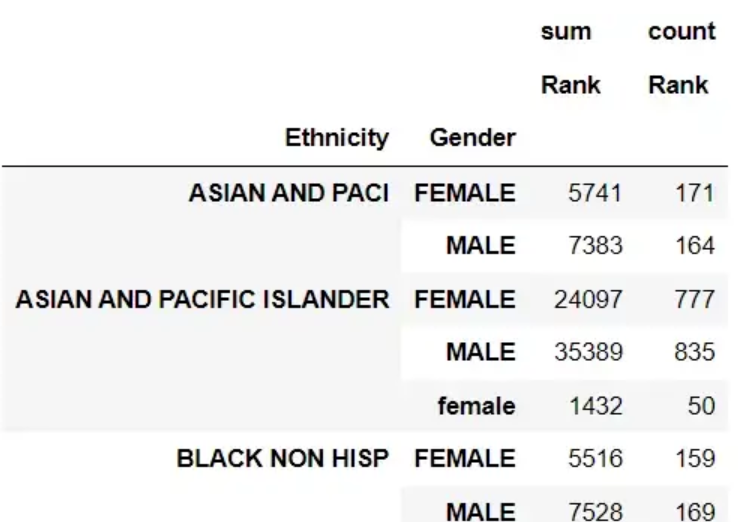

# rename
* df_rename = df.rename(columns={'Count': 'count', 'Rank':'rank'})
* df_rename = df.rename(index={0:'first',1:'second',2:'third'})

# to_datetime

## 本地化时区
* 本地化意味着将给定的时区更改为目标或所需的时区。这样做不会改变数据集中的任何内容，只是日期和时间将显示在所选择的时区中。
* 如果你拿到的时间序列数据集是UTC格式的，而你的客户要求你根据例如美洲时区来处理气候数据。你就需要在将其提供给模型之前对其进行更改，因为如果您不这样做模型将生成的结果将全部基于UTC。
  * 修改方法： df.index = df.index.tz_localize("UTC")
  * 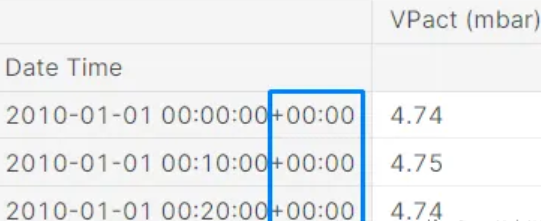
* 将UTC时区转换为我们想要的时区
  * df.index = df.index.tz_convert("Asia/Qatar") 
  * 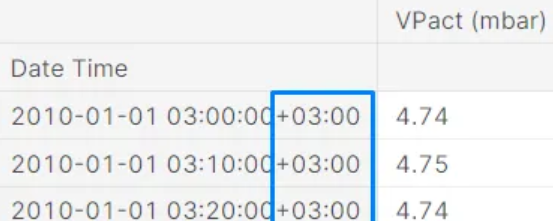



In [2]:
import pandas as pd
df = pd.DataFrame({'year': [2015, 2016],
                    'month': [2, 3],
                    'day': [4, 5]})
print('dataframe to pd datetime：', pd.to_datetime(df))

s = pd.Series(['3/11/2000', '3/12/2000', '3/13/2000'])
s.head()


pd.to_datetime(1490195805, unit='s')
# output: Timestamp('2017-03-22 15:16:45')
pd.to_datetime(1490195805433502912, unit='ns')
# output: Timestamp('2017-03-22 15:16:45.433502912')
# Using a non-unix epoch origin

pd.to_datetime([1, 2, 3], unit='D', origin=pd.Timestamp('1960-01-01'))

# 制作时间索引：
# 我们也可以应用 pd.to_datetime(df.index) 来制作日期时间类型的索引

s

dataframe to pd datetime： 0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]


0    3/11/2000
1    3/12/2000
2    3/13/2000
dtype: object

# plot
* 可选选项有line、bar、barh、hist、box、kde、density、area、pie、scatter和hexbin。
* title,xlabel,ylabel,legend,grid,xlim,ylim,xticks,yticks等，df.plot()只是matplotlib的一个方便包装。所以matplotlib的参数都可以在df.plot中使用
*  df['Gender'].value_counts().plot(kind='bar')
*  df['Gender'].value_counts().plot(kind='pie')

# Read and write

## read a column as string
```python
# 使用;作为分隔符，第一行作为标题，第一列作为索引，跳过前5行，将N/ a替换为NaN
df_basic = pd.read_csv(stock_basic_csv, dtype={'columnA': str}， sep=';', header=0, index_col=0, skiprows=5, na_values='N/A', usecols=['a', 'b', 'c'])
```


# Text

## 字符串操作的函数：

.lower():将 DataFrame 中字符串中的所有大写字符转换为小写，并在结果中返回小写字符串。
.upper():将 DataFrame 中字符串中的所有小写字符转换为大写，并在结果中返回大写字符串。
.strip():如果字符串的开头或结尾有空格，我们应该使用 strip() 修剪字符串以消除空格或删除 DataFrame 中字符串包含的额外空格。
.islower():它检查 Index 中的每个字符串中的所有字符是否为DataFrame小写，并返回一个布尔值。
.isupper():它检查索引中每个字符串中的所有字符是否为DataFrame大写，并返回一个布尔值。
.isnumeric():它检查 Index 中的每个字符串中的所有字符是否DataFrame都是数字，并返回一个布尔值。
.swapcase():它将大小写从下调到上调，反之亦然。

In [1]:
import pandas as pd
import numpy as np

serie = pd.Series(['lev gor\'kov', np.nan, 'brillouin', 'albert einstein', 'carl m. bender'])

print(f'Lowercase all letters:\n{serie.str.lower()}\n')

print(f'Uppercase all letters:\n{serie.str.upper()}\n')

# Convert strings in the Series/Index to be capitalized
print(f'Uppercase the first letter:\n{serie.str.capitalize()}\n')

print(f'Uppercase the first letter of each word:\n{serie.str.title()}\n')

Lowercase all letters:
0        lev gor'kov
1                NaN
2          brillouin
3    albert einstein
4     carl m. bender
dtype: object

Uppercase all letters:
0        LEV GOR'KOV
1                NaN
2          BRILLOUIN
3    ALBERT EINSTEIN
4     CARL M. BENDER
dtype: object

Uppercase the first letter:
0        Lev gor'kov
1                NaN
2          Brillouin
3    Albert einstein
4     Carl m. bender
dtype: object

Uppercase the first letter of each word:
0        Lev Gor'Kov
1                NaN
2          Brillouin
3    Albert Einstein
4     Carl M. Bender
dtype: object



## split

* 使用expand=True将返回DataFrame很容易与另一个 . 连接的结果DataFrame。

In [2]:

import pandas as pd
import numpy as np

serie = pd.Series(['lev gor\'kov', np.nan, 'brillouin', 'albert einstein', 'carl m. bender'])

print(f'Before Splitting:\n{serie}\n')

new_serie = (
    serie.str.title()
    .str.split(' ', expand=True, n=1)
    .rename(columns={0:'First Name', 1:'Last Name'})
)

print(f'After Splitting:\n{new_serie}')

Before Splitting:
0        lev gor'kov
1                NaN
2          brillouin
3    albert einstein
4     carl m. bender
dtype: object

After Splitting:
  First Name  Last Name
0        Lev    Gor'Kov
1        NaN        NaN
2  Brillouin       None
3     Albert   Einstein
4       Carl  M. Bender


## 替换字符串

### .replace(a,b)用值 b 替换值 a

### 正则表达式

In [ ]:
import pandas as pd
import numpy as np

serie = pd.Series(['lev gor\'kov', np.nan, 'Dr. brillouin', 'Pr. albert einstein', 'carl m. bender'])

print(f'Before Replacing:\n{serie}\n')

new_serie = (
    serie.str.replace('Dr.', '', regex=False)
    .str.replace('Pr.', '', regex=False)
    .str.strip()
    .str.title()
    .str.split(' ', expand=True, n=1)
    .rename(columns={0:'First Name', 1:'Last Name'})
)

print(f'After Replacing:\n{new_serie}')

## 连接

### cat
* cat(sep=’ ‘)：它将DataFrame索引元素或每个字符串DataFrame与给定的分隔符连接起来。

In [ ]:
import pandas as pd
import numpy as np

s_1 = pd.Series(["Albert", "John", "Robert", np.nan, "Jack"], dtype="string")
s_2 = pd.Series(["Doe", "Piter", "David", "Eden", "Carl"], dtype="string")


# We can specify a separator
print(f'Concatinate and ignore missing values:\n{s_1.str.cat(s_2, sep=" ")}\n')


# Missing values are ignored by default, 
# use 'na_rep' to catch them
print()
print(f'Concatinate and replace missing values with "-":\n{s_1.str.cat(s_2, sep=" ", na_rep="-")}\n')

## 附加方法：
* .startswith(pattern)：如果 DataFrame Index 中的元素或字符串以模式开头，则返回 true。
* .endswith(pattern)：如果 DataFrame 索引中的元素或字符串以模式结尾，则返回 true。
* .repeat(value)：它重复每个元素给定的次数，如下例所示，每个字符串在 DataFrame 中有两次出现。
* .find(pattern)：它返回模式第一次出现的第一个位置。

## 文本信息提取
* .len():在 的帮助下，len()我们可以计算 DataFrame 中每个字符串的长度，如果 DataFrame 中有空数据，则返回NaN.
* .count(pattern):它返回模式在每个元素中出现的次数，DataFrame如下例所示，它计算每个字符串中的空格DataFrame并返回每个字符串中的单词总数。
* .findall(pattern):它返回所有出现的模式的列表。在下面的示例中，我们通过了一个正则表达式来查找数据中的时间。
* 

In [14]:
import pandas as pd


time_sentences = ["Saturday: Weekend (Not working day)",
                  "Sunday: Weekend (Not working day)",
                  "Monday: The doctor's appointment is at 2:45pm.",
                  "Tuesday: The dentist's appointment is at 11:30 am.",
                  "Wednesday: At 7:00pm, there is a basketball game!",
                  "Thursday: Be back home by 11:15 pm at the latest.",
                  "Friday: Take the train at 08:10 am, arrive at 09:00am."]

df = pd.DataFrame(time_sentences, columns=['text'])

(
    df
    .assign(text=df.text.str.lower(),
            text_len=df.text.str.len(),
            word_count=df.text.str.count(" ") + 1,
            weekend=df.text.str.contains("saturday|sunday", case=False),
            appointment_time=df.text.str.findall(r"(\d?\d):(\d\d)"),
           )
)

,text,text_len,word_count,weekend,appointment_time
0,saturday: weekend (not working day),35,5,True,[]
1,sunday: weekend (not working day),33,5,True,[]
2,monday: the doctor's appointment is at 2:45pm.,46,7,False,"[(2, 45)]"
3,tuesday: the dentist's appointment is at 11:30...,50,8,False,"[(11, 30)]"
4,"wednesday: at 7:00pm, there is a basketball game!",49,8,False,"[(7, 00)]"
5,thursday: be back home by 11:15 pm at the latest.,49,10,False,"[(11, 15)]"
6,"friday: take the train at 08:10 am, arrive at ...",54,10,False,"[(08, 10), (09, 00)]"


# database

## sshtunnel + read_sql

In [8]:
# creating database engine

from sqlalchemy import create_engine
import pandas as pd
from sshtunnel import SSHTunnelForwarder

bind_port = 3306

with SSHTunnelForwarder(
    ('15.229.25.198', 22),
    ssh_username='ubuntu',
    ssh_host_key=None,
    ssh_password=None,
    ssh_pkey="D:\\ubuntu_share\\sabala.pem",
    ssh_private_key_password='',
    remote_bind_address=('sabala2.cfohzpxi7tgg.sa-east-1.rds.amazonaws.com', bind_port), # 跳板机可以访问的机器
    local_bind_address=('0.0.0.0', bind_port) # remote 映射成本地
) as tunnel:
    tunnel.start()
    engine = create_engine(url='mysql://{user}:{password}@{host}:{port}/{db}'.format(
        user='scada_r',
        password='scada_r2wsxa',
        host='127.0.0.1',
        port=3306,
        db='sabala'
    ))

    df = pd.read_sql(sql="SELECT device_id, query_txt, intent_name, intent_type, create_time, rule_cos_time, lambda_cos_time, sql_cos_time, third_cos_time, total_time, response_txt from request_log ORDER BY create_time DESC limit 10 ", con=engine)

2023-02-22 22:17:17,271| ERROR   | Password is required for key C:\Users\73915/.ssh\id_rsa


In [9]:
df

,device_id,query_txt,intent_name,intent_type,create_time,rule_cos_time,lambda_cos_time,sql_cos_time,third_cos_time,total_time,response_txt
0,010101012003180000003446,Desligar,MUSIC-PLAY-PAUSE,LOCAL_INTENT,2023-02-22 22:16:41,70,0,0,0,2247,"{""directive"":{""payload"":{""dialog"":{""response"":..."
1,010101012003180000003446,Músicas do Benito de Paula,MUSIC-PLAY,LOCAL_INTENT,2023-02-22 22:16:29,73,0,567,0,5439,"{""directive"":{""payload"":{""dialog"":{""response"":..."
2,010101012003180000003446,Músicas Charlie Brown Jr.,MUSIC-PLAY,LOCAL_INTENT,2023-02-22 22:16:07,73,0,1839,0,6338,"{""directive"":{""payload"":{""dialog"":{""response"":..."
3,010101012003180000003446,Músicas Benito de Paula,MUSIC-PLAY,LOCAL_INTENT,2023-02-22 22:15:39,21,0,580,0,5126,"{""directive"":{""payload"":{""dialog"":{""response"":..."
4,010101012003180000003446,Se eu for falar Charlie Brown,Chat_68,GOOGLE_DIALOGFLOW,2023-02-22 22:15:25,731,883,0,0,6088,"{""directive"":{""payload"":{""dialog"":{""response"":..."
5,010101012003180000010304,Parar música,MUSIC-PLAY-PAUSE,LOCAL_INTENT,2023-02-22 22:15:17,73,0,0,0,1281,"{""directive"":{""payload"":{""dialog"":{""response"":..."
6,010101012003180000003446,Oi meu bem música Benito de Paula coxa Brown,MUSIC-PLAY,LOCAL_INTENT,2023-02-22 22:15:14,23,0,212,0,5123,"{""directive"":{""payload"":{""dialog"":{""response"":..."
7,010101012003180000010304,Ligeiro,MUSIC-PLAY,LOCAL_INTENT,2023-02-22 22:15:03,73,0,2557,0,5534,"{""directive"":{""payload"":{""dialog"":{""response"":..."
8,010101012003180000003446,Desligar só se fosse mulher são estava reclamando,MUSIC-PLAY-PAUSE,LOCAL_INTENT,2023-02-22 22:14:07,82,0,0,0,7294,"{""directive"":{""payload"":{""dialog"":{""response"":..."
9,010101012003180000003446,Conte uma piada,TellJoke,LOCAL_INTENT,2023-02-22 22:13:28,26,848,0,0,3958,"{""directive"":{""payload"":{""dialog"":{""response"":..."


In [ ]:
df

,device_id,query_txt,intent_name,intent_type,create_time,rule_cos_time,lambda_cos_time,sql_cos_time,third_cos_time,total_time,response_txt
0,010101012003180000003446,Desligar,MUSIC-PLAY-PAUSE,LOCAL_INTENT,2023-02-22 22:16:41,70,0,0,0,2247,"{""directive"":{""payload"":{""dialog"":{""response"":..."
1,010101012003180000003446,Músicas do Benito de Paula,MUSIC-PLAY,LOCAL_INTENT,2023-02-22 22:16:29,73,0,567,0,5439,"{""directive"":{""payload"":{""dialog"":{""response"":..."
2,010101012003180000003446,Músicas Charlie Brown Jr.,MUSIC-PLAY,LOCAL_INTENT,2023-02-22 22:16:07,73,0,1839,0,6338,"{""directive"":{""payload"":{""dialog"":{""response"":..."
3,010101012003180000003446,Músicas Benito de Paula,MUSIC-PLAY,LOCAL_INTENT,2023-02-22 22:15:39,21,0,580,0,5126,"{""directive"":{""payload"":{""dialog"":{""response"":..."
4,010101012003180000003446,Se eu for falar Charlie Brown,Chat_68,GOOGLE_DIALOGFLOW,2023-02-22 22:15:25,731,883,0,0,6088,"{""directive"":{""payload"":{""dialog"":{""response"":..."
5,010101012003180000010304,Parar música,MUSIC-PLAY-PAUSE,LOCAL_INTENT,2023-02-22 22:15:17,73,0,0,0,1281,"{""directive"":{""payload"":{""dialog"":{""response"":..."
6,010101012003180000003446,Oi meu bem música Benito de Paula coxa Brown,MUSIC-PLAY,LOCAL_INTENT,2023-02-22 22:15:14,23,0,212,0,5123,"{""directive"":{""payload"":{""dialog"":{""response"":..."
7,010101012003180000010304,Ligeiro,MUSIC-PLAY,LOCAL_INTENT,2023-02-22 22:15:03,73,0,2557,0,5534,"{""directive"":{""payload"":{""dialog"":{""response"":..."
8,010101012003180000003446,Desligar só se fosse mulher são estava reclamando,MUSIC-PLAY-PAUSE,LOCAL_INTENT,2023-02-22 22:14:07,82,0,0,0,7294,"{""directive"":{""payload"":{""dialog"":{""response"":..."
9,010101012003180000003446,Conte uma piada,TellJoke,LOCAL_INTENT,2023-02-22 22:13:28,26,848,0,0,3958,"{""directive"":{""payload"":{""dialog"":{""response"":..."


In [ ]:
df

,device_id,query_txt,intent_name,intent_type,create_time,rule_cos_time,lambda_cos_time,sql_cos_time,third_cos_time,total_time,response_txt
0,010101012003180000003446,Desligar,MUSIC-PLAY-PAUSE,LOCAL_INTENT,2023-02-22 22:16:41,70,0,0,0,2247,"{""directive"":{""payload"":{""dialog"":{""response"":..."
1,010101012003180000003446,Músicas do Benito de Paula,MUSIC-PLAY,LOCAL_INTENT,2023-02-22 22:16:29,73,0,567,0,5439,"{""directive"":{""payload"":{""dialog"":{""response"":..."
2,010101012003180000003446,Músicas Charlie Brown Jr.,MUSIC-PLAY,LOCAL_INTENT,2023-02-22 22:16:07,73,0,1839,0,6338,"{""directive"":{""payload"":{""dialog"":{""response"":..."
3,010101012003180000003446,Músicas Benito de Paula,MUSIC-PLAY,LOCAL_INTENT,2023-02-22 22:15:39,21,0,580,0,5126,"{""directive"":{""payload"":{""dialog"":{""response"":..."
4,010101012003180000003446,Se eu for falar Charlie Brown,Chat_68,GOOGLE_DIALOGFLOW,2023-02-22 22:15:25,731,883,0,0,6088,"{""directive"":{""payload"":{""dialog"":{""response"":..."
5,010101012003180000010304,Parar música,MUSIC-PLAY-PAUSE,LOCAL_INTENT,2023-02-22 22:15:17,73,0,0,0,1281,"{""directive"":{""payload"":{""dialog"":{""response"":..."
6,010101012003180000003446,Oi meu bem música Benito de Paula coxa Brown,MUSIC-PLAY,LOCAL_INTENT,2023-02-22 22:15:14,23,0,212,0,5123,"{""directive"":{""payload"":{""dialog"":{""response"":..."
7,010101012003180000010304,Ligeiro,MUSIC-PLAY,LOCAL_INTENT,2023-02-22 22:15:03,73,0,2557,0,5534,"{""directive"":{""payload"":{""dialog"":{""response"":..."
8,010101012003180000003446,Desligar só se fosse mulher são estava reclamando,MUSIC-PLAY-PAUSE,LOCAL_INTENT,2023-02-22 22:14:07,82,0,0,0,7294,"{""directive"":{""payload"":{""dialog"":{""response"":..."
9,010101012003180000003446,Conte uma piada,TellJoke,LOCAL_INTENT,2023-02-22 22:13:28,26,848,0,0,3958,"{""directive"":{""payload"":{""dialog"":{""response"":..."


# others


## How to print an entire Pandas DataFrame in Python?

- https://www.geeksforgeeks.org/how-to-print-an-entire-pandas-dataframe-in-python/

## make pandas display width lagger in jupyter

- pd.set_option('display.width', 800)
- pd.set_option("display.max_rows", 100)
- pd.set_option("display.min_rows", 100)
- pd.set_option("max_columns", 20)
- https://builtin.com/data-science/pandas-show-all-columns


# awesome python libray coupled with pandas
## pandas_datareader
* lots of finacial data api for oversea equities used with pandas

## pandas_ta 
* an easy to use library that leverages the Pandas library with more than 130 financial Indicators and Utility functions. 
* almost with no extra code for computing the indicators, just comes with pandas dataframe with simple dict config.
* tutorial
  * https://morioh.com/p/0aa3e75ff555
  * https://technical-analysis-library-in-python.readthedocs.io/en/latest/

## Bamboolib 
* jupyter 中图形化读入excel
* 你可以使用 Bamboolib，查看它生成的代码，并从中学习。


# trouble shooting

##  SettingWithCopyWarning

* 原因是修改了Dataframe 的view，使用copy就可避免
* df1 = daily_df[daily_df.trade_count > 0.].copy()
* 解决方案2： 

```python
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
```

In [4]:
!pip install skope-rules -U

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/


In [6]:
from sklearn.datasets import load_iris
from skrules import SkopeRules

dataset = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
clf = SkopeRules(max_depth_duplication=2,
                 n_estimators=30,
                 precision_min=0.3,
                 recall_min=0.1,
                 feature_names=feature_names)

for idx, species in enumerate(dataset.target_names):
    X, y = dataset.data, dataset.target
    clf.fit(X, y == idx)
    rules = clf.rules_[0:3]
    print("Rules for iris", species)
    for rule in rules:
        print(rule)
    print()
    print(20*'=')
    print()


Rules for iris setosa
('petal_length <= 2.449999988079071', (1.0, 1.0, 23))
('petal_width <= 0.800000011920929', (1.0, 1.0, 27))


Rules for iris versicolor
('petal_length <= 4.950000047683716 and petal_width <= 1.6500000357627869 and petal_width > 0.800000011920929', (1.0, 0.9644381223328592, 3))
('petal_length <= 4.75 and petal_width > 0.800000011920929', (0.972972972972973, 0.9230769230769231, 1))
('petal_length <= 4.75 and petal_length > 2.449999988079071', (0.9736842105263158, 0.9024390243902439, 1))


Rules for iris virginica
('petal_width > 1.75', (0.9802350427350428, 0.9026375496313103, 4))
('petal_length > 4.75 and petal_width > 1.75', (0.97266885161622, 0.8915703110183213, 6))
('petal_length > 5.049999952316284', (0.9715498615498616, 0.835374429731835, 5))


